# Training and running a linear model using sklearn

### datapath define

In [29]:
import os
datapath = os.path.join("handson-ml-master","datasets","lifesat", "")

### prepare country stats table function

In [30]:

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

### import libraries

In [50]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as linear_model

### load the data

In [39]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=",");
gdp_data =  pd.read_csv(datapath + "gdp_per_capita.csv", thousands=",", delimiter='\t', encoding='latin1', na_values="n/a");

### prepare data

In [40]:
country_stats= prepare_country_stats(oecd_bli, gdp_data)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

### visualize the data

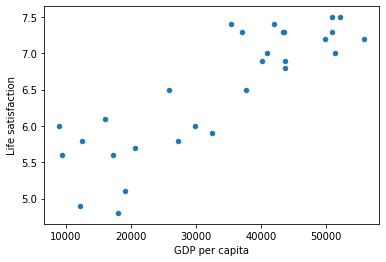

In [48]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

### select a linear model

In [51]:
model = linear_model.LinearRegression()

### Train the model

In [52]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Make a prediction for Cyprus

In [53]:
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[5.96242338]]


### use knn model for instance based learning

In [54]:
clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [55]:
clf.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [56]:
print(clf.predict(X_new))

[[5.76666667]]
